Importing Libraries

In [33]:
!pip install scikit-surprise

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from surprise import Dataset, Reader, SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from surprise import KNNBasic
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore")

Imporitng Dataset

In [35]:
music =pd.read_csv("dataset.csv")
music

song_id                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...       ...                     ...                     ...   
6077     6077  1nLF4GpaJe54kjjBVxIBRS                 Bathory   
6078     6078  0JNQXKglzHsy4eed3PWxgP                  End It   
6079     6079  4ATJgvvr6VLCkAMZ8MxfUt         Truchło Strzygi   
6080     6080  1T0LELb5T66hlUGmeTyTow                Eisregen   
6081     6081                     NaN                     NaN   

                                             album_name  \
0                                                Comedy   
1                                      Ghost (Acoustic)   
2                                        To Begin Again   
3     Crazy Rich Asians (Original Motion Picture Sou...   
4                                               Hold On   
...                                                 ...   
6077                                   Blood Fire Death   
6078                                             End It   
6079                                     Gwiezdny Demon   
6080                                   Satan liebt dich   
6081                                                NaN   

                        track_name  popularity  duration_ms explicit  \
0                           Comedy        73.0     230666.0    False   
1                 Ghost - Acoustic        55.0     149610.0    False   
2                   To Begin Again        57.0     210826.0    False   
3       Can't Help Falling In Love        71.0     201933.0    False   
4                          Hold On        82.0     198853.0    False   
...                            ...         ...          ...      ...   
6077             A Fine Day to Die        48.0     516266.0    False   
6078                   Blind Faith        24.0     171458.0    False   
6079  Ostatnie tchnienie Nosferatu        25.0     250326.0     True   
6080                  Onkel Fritze        23.0     186653.0    False   
6081                           NaN         NaN          NaN      NaN   

      danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0            0.676  0.4610  ...    -6.746   0.0       0.1430      0.032200   
1            0.420  0.1660  ...   -17.235   1.0       0.0763      0.924000   
2            0.438  0.3590  ...    -9.734   1.0       0.0557      0.210000   
3            0.266  0.0596  ...   -18.515   1.0       0.0363      0.905000   
4            0.618  0.4430  ...    -9.681   1.0       0.0526      0.469000   
...            ...     ...  ...       ...   ...          ...           ...   
6077         0.232  0.9310  ...    -8.804   1.0       0.0808      0.004130   
6078         0.210  0.9310  ...    -5.296   1.0       0.0669      0.000036   
6079         0.341  0.9240  ...    -4.794   1.0       0.0490      0.000011   
6080         0.488  0.9930  ...    -4.666   1.0       0.1940      0.000421   
6081           NaN     NaN  ...       NaN   NaN          NaN           NaN   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000001    0.3580   0.7150   87.917             4.0   
1             0.000006    0.1010   0.2670   77.489             4.0   
2             0.000000    0.1170   0.1200   76.332             4.0   
3             0.000071    0.1320   0.1430  181.740             3.0   
4             0.000000    0.0829   0.1670  119.949             4.0   
...                ...       ...      ...      ...             ...   
6077          0.756000    0.0927   0.0371  122.684             4.0   
6078          0.909000    0.3430   0.4530  156.866             4.0   
6079          0.009830    0.2810   0.2850  132.477             4.0   
6080          

In [36]:
music.head()

song_id                track_id                 artists  \
0        0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1        1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2        2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3        3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4        4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms explicit  danceability  \
0                      Comedy        73.0     230666.0    False         0.676   
1            Ghost - Acoustic        55.0     149610.0    False         0.420   
2              To Begin Again        57.0     210826.0    False         0.438   
3  Can't Help Falling In Love        71.0     201933.0    False         0.266   
4                     Hold On        82.0     198853.0    False         0.618   

   energy  ...  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.4610  ...    -6.746   0.0       0.1430        0.0322          0.000001   
1  0.1660  ...   -17.235   1.0       0.0763        0.9240          0.000006   
2  0.3590  ...    -9.734   1.0       0.0557        0.2100          0.000000   
3  0.0596  ...   -18.515   1.0       0.0363        0.9050          0.000071   
4  0.4430  ...    -9.681   1.0       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre  
0    0.3580    0.715   87.917             4.0     acoustic  
1    0.1010    0.267   77.489             4.0     acoustic  
2    0.1170    0.120   76.332             4.0     acoustic  
3    0.1320    0.143  181.740             3.0     acoustic  
4    0.0829    0.167  119.949             4.0     acoustic  

[5 rows x 21 columns]

In [37]:
music.tail()

song_id                track_id          artists        album_name  \
6077     6077  1nLF4GpaJe54kjjBVxIBRS          Bathory  Blood Fire Death   
6078     6078  0JNQXKglzHsy4eed3PWxgP           End It            End It   
6079     6079  4ATJgvvr6VLCkAMZ8MxfUt  Truchło Strzygi    Gwiezdny Demon   
6080     6080  1T0LELb5T66hlUGmeTyTow         Eisregen  Satan liebt dich   
6081     6081                     NaN              NaN               NaN   

                        track_name  popularity  duration_ms explicit  \
6077             A Fine Day to Die        48.0     516266.0    False   
6078                   Blind Faith        24.0     171458.0    False   
6079  Ostatnie tchnienie Nosferatu        25.0     250326.0     True   
6080                  Onkel Fritze        23.0     186653.0    False   
6081                           NaN         NaN          NaN      NaN   

      danceability  energy  ...  loudness  mode  speechiness  acousticness  \
6077         0.232   0.931  ...    -8.804   1.0       0.0808      0.004130   
6078         0.210   0.931  ...    -5.296   1.0       0.0669      0.000036   
6079         0.341   0.924  ...    -4.794   1.0       0.0490      0.000011   
6080         0.488   0.993  ...    -4.666   1.0       0.1940      0.000421   
6081           NaN     NaN  ...       NaN   NaN          NaN           NaN   

      instrumentalness  liveness  valence    tempo  time_signature  \
6077          0.756000    0.0927   0.0371  122.684             4.0   
6078          0.909000    0.3430   0.4530  156.866             4.0   
6079          0.009830    0.2810   0.2850  132.477             4.0   
6080          0.000003    0.3530   0.1520  140.043             4.0   
6081               NaN       NaN      NaN      NaN             NaN   

      track_genre  
6077  black-metal  
6078  black-metal  
6079  black-metal  
6080  black-metal  
6081          NaN  

[5 rows x 21 columns]

Data Cleaning

In [38]:
music.shape

(6082, 21)

In [39]:
music.dtypes

song_id               int64
track_id             object
artists              object
album_name           object
track_name           object
popularity          float64
duration_ms         float64
explicit             object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
track_genre          object
dtype: object

In [40]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6082 entries, 0 to 6081
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           6082 non-null   int64  
 1   track_id          6081 non-null   object 
 2   artists           6081 non-null   object 
 3   album_name        6081 non-null   object 
 4   track_name        6081 non-null   object 
 5   popularity        6081 non-null   float64
 6   duration_ms       6081 non-null   float64
 7   explicit          6081 non-null   object 
 8   danceability      6081 non-null   float64
 9   energy            6081 non-null   float64
 10  key               6081 non-null   float64
 11  loudness          6081 non-null   float64
 12  mode              6081 non-null   float64
 13  speechiness       6081 non-null   float64
 14  acousticness      6081 non-null   float64
 15  instrumentalness  6081 non-null   float64
 16  liveness          6081 non-null   float64


In [41]:
music.describe()

song_id   popularity   duration_ms  danceability       energy  \
count  6082.0000  6081.000000  6.081000e+03   6081.000000  6081.000000   
mean   3040.5000    36.332840  2.294719e+05      0.533548     0.591050   
std    1755.8665    23.785937  8.294267e+04      0.169028     0.284733   
min       0.0000     0.000000  3.182400e+04      0.000000     0.001440   
25%    1520.2500    18.000000  1.826080e+05      0.425000     0.358000   
50%    3040.5000    43.000000  2.215460e+05      0.542000     0.653000   
75%    4560.7500    54.000000  2.614800e+05      0.659000     0.843000   
max    6081.0000    93.000000  1.478618e+06      0.974000     1.000000   

               key     loudness         mode  speechiness  acousticness  \
count  6081.000000  6081.000000  6081.000000  6081.000000   6081.000000   
mean      5.353231    -9.297235     0.617662     0.064255      0.354317   
std       3.555094     6.338601     0.485999     0.061685      0.363603   
min       0.000000   -41.808000     0.000000     0.000000      0.000001   
25%       2.000000   -10.831000     0.000000     0.033700      0.019700   
50%       5.000000    -7.300000     1.000000     0.042900      0.198000   
75%       8.000000    -5.268000     1.000000     0.065200      0.725000   
max      11.000000     0.698000     1.000000     0.924000      0.996000   

       instrumentalness     liveness      valence        tempo  time_signature  
count       6081.000000  6081.000000  6081.000000  6081.000000     6081.000000  
mean           0.223389     0.179616     0.453265   119.963765        3.881434  
std            0.361741     0.151678     0.265431    30.541048        0.454060  
min            0.000000     0.014400     0.000000     0.000000        0.000000  
25%            0.000000     0.094700     0.223000    96.386000        4.000000  
50%            0.000261     0.117000     0.431000   119.598000        4.000000  
75%            0.431000     0.218000     0.669000   140.061000        4.000000  
max            0.988000     0.992000     0.995000   220.081000        5.000000

In [42]:
music.iloc[:,1:]

track_id                 artists  \
0     5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1     4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2     1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3     6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4     5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                      ...                     ...   
6077  1nLF4GpaJe54kjjBVxIBRS                 Bathory   
6078  0JNQXKglzHsy4eed3PWxgP                  End It   
6079  4ATJgvvr6VLCkAMZ8MxfUt         Truchło Strzygi   
6080  1T0LELb5T66hlUGmeTyTow                Eisregen   
6081                     NaN                     NaN   

                                             album_name  \
0                                                Comedy   
1                                      Ghost (Acoustic)   
2                                        To Begin Again   
3     Crazy Rich Asians (Original Motion Picture Sou...   
4                                               Hold On   
...                                                 ...   
6077                                   Blood Fire Death   
6078                                             End It   
6079                                     Gwiezdny Demon   
6080                                   Satan liebt dich   
6081                                                NaN   

                        track_name  popularity  duration_ms explicit  \
0                           Comedy        73.0     230666.0    False   
1                 Ghost - Acoustic        55.0     149610.0    False   
2                   To Begin Again        57.0     210826.0    False   
3       Can't Help Falling In Love        71.0     201933.0    False   
4                          Hold On        82.0     198853.0    False   
...                            ...         ...          ...      ...   
6077             A Fine Day to Die        48.0     516266.0    False   
6078                   Blind Faith        24.0     171458.0    False   
6079  Ostatnie tchnienie Nosferatu        25.0     250326.0     True   
6080                  Onkel Fritze        23.0     186653.0    False   
6081                           NaN         NaN          NaN      NaN   

      danceability  energy   key  loudness  mode  speechiness  acousticness  \
0            0.676  0.4610   1.0    -6.746   0.0       0.1430      0.032200   
1            0.420  0.1660   1.0   -17.235   1.0       0.0763      0.924000   
2            0.438  0.3590   0.0    -9.734   1.0       0.0557      0.210000   
3            0.266  0.0596   0.0   -18.515   1.0       0.0363      0.905000   
4            0.618  0.4430   2.0    -9.681   1.0       0.0526      0.469000   
...            ...     ...   ...       ...   ...          ...           ...   
6077         0.232  0.9310   9.0    -8.804   1.0       0.0808      0.004130   
6078         0.210  0.9310   0.0    -5.296   1.0       0.0669      0.000036   
6079         0.341  0.9240   6.0    -4.794   1.0       0.0490      0.000011   
6080         0.488  0.9930  10.0    -4.666   1.0       0.1940      0.000421   
6081           NaN     NaN   NaN       NaN   NaN          NaN           NaN   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000001    0.3580   0.7150   87.917             4.0   
1             0.000006    0.1010   0.2670   77.489             4.0   
2             0.000000    0.1170   0.1200   76.332             4.0   
3             0.000071    0.1320   0.1430  181.740             3.0   
4             0.000000    0.0829   0.1670  119.949             4.0   
...                ...       ...      ...      ...             ...   
6077          0.756000    0.0927   0.0371  122.684             4.0   
6078          0.909000    0.3430   0.4530  156.866             4.0   
6079          0.009830    0.2810   0.2850  132.477             4.0   
6080          0.000003    0.3530   0.1520  140.043             4.0   
6081               NaN       NaN      NaN      NaN    

In [43]:
music.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6077    False
6078    False
6079    False
6080    False
6081    False
Length: 6082, dtype: bool

In [44]:
music_cleaned=music.drop_duplicates()

In [45]:
music_cleaned.shape

(6082, 21)

  Verifying Null Values

In [46]:
music.isnull().sum()

song_id             0
track_id            1
artists             1
album_name          1
track_name          1
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [47]:
music.fillna(0,inplace=True)

In [48]:
music.isnull().sum()

song_id             0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [49]:
track_count=music.groupby("track_genre").size()
print(track_count)

track_genre
0                 1
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
anime          1000
black-metal      81
dtype: int64


In [50]:
music.corr()

song_id  popularity  duration_ms  danceability    energy  \
song_id           1.000000    0.160927    -0.005502     -0.287723 -0.017566   
popularity        0.160927    1.000000    -0.031977     -0.117532 -0.165483   
duration_ms      -0.005502   -0.031977     1.000000     -0.074527  0.135004   
danceability     -0.287723   -0.117532    -0.074527      1.000000  0.274291   
energy           -0.017566   -0.165483     0.135004      0.274291  1.000000   
key              -0.008181   -0.024128     0.019624      0.051349  0.064856   
loudness         -0.175727   -0.119682     0.118177      0.353622  0.814192   
mode             -0.119887    0.004186    -0.027017     -0.023317 -0.050079   
speechiness       0.085872   -0.076373    -0.056680      0.172848  0.253676   
acousticness     -0.013957    0.141324    -0.158167     -0.223863 -0.823361   
instrumentalness  0.330323    0.069757    -0.060439     -0.310640 -0.439504   
liveness          0.019728   -0.040381     0.025643      0.012934  0.231968   
valence          -0.287733   -0.218793    -0.050477      0.576934  0.531908   
tempo            -0.010875   -0.025286     0.036173     -0.035182  0.217451   
time_signature   -0.069721   -0.026169     0.046115      0.231390  0.215001   

                       key  loudness      mode  speechiness  acousticness  \
song_id          -0.008181 -0.175727 -0.119887     0.085872     -0.013957   
popularity       -0.024128 -0.119682  0.004186    -0.076373      0.141324   
duration_ms       0.019624  0.118177 -0.027017    -0.056680     -0.158167   
danceability      0.051349  0.353622 -0.023317     0.172848     -0.223863   
energy            0.064856  0.814192 -0.050079     0.253676     -0.823361   
key               1.000000  0.051385 -0.112905     0.024114     -0.065962   
loudness          0.051385  1.000000  0.019139     0.149405     -0.713352   
mode             -0.112905  0.019139  1.000000    -0.104211      0.048510   
speechiness       0.024114  0.149405 -0.104211     1.000000     -0.135425   
acousticness     -0.065962 -0.713352  0.048510    -0.135425      1.000000   
instrumentalness -0.026131 -0.633868 -0.112102    -0.156318      0.402847   
liveness         -0.004763  0.167796 -0.004720     0.124752     -0.173155   
valence           0.064396  0.454240 -0.020241     0.167806     -0.398509   
tempo             0.021562  0.200342  0.027516     0.091205     -0.189605   
time_signature    0.020198  0.220346  0.002764     0.066980     -0.187208   

                  instrumentalness  liveness   valence     tempo  \
song_id                   0.330323  0.019728 -0.287733 -0.010875   
popularity                0.069757 -0.040381 -0.218793 -0.025286   
duration_ms              -0.060439  0.025643 -0.050477  0.036173   
danceability             -0.310640  0.012934  0.576934 -0.035182   
energy                   -0.439504  0.231968  0.531908  0.217451   
key                      -0.026131 -0.004763  0.064396  0.021562   
loudness                 -0.633868  0.167796  0.454240  0.200342   
mode                     -0.112102 -0.004720 -0.020241  0.027516   
speechiness              -0.156318  0.124752  0.167806  0.091205   
acousticness              0.402847 -0.173155 -0.398509 -0.189605   
instrumentalness          1.000000 -0.144392 -0.355099 -0.140174   
liveness                 -0.144392  1.000000  0.109985  0.018406   
valence                  -0.355099  0.109985  1.000000  0.113148   
tempo                    -0.140174  0.018406  0.113148  1.000000   
time_signature           -0.168983  0.060387  0.183357  0.005825   

                  time_signature  
song_id                -0.069721  
popularity             -0.026169  
duration_ms             0.046115  
danceability            0.231390  
energy                  0.215001  
key                     0.020198  
loudness                0.220346  
mode                    0.002764  
speechiness             0.066980  
acousticness           -0.187208  
instrumentalness       -0.168983  
liveness    

EDA Visualization

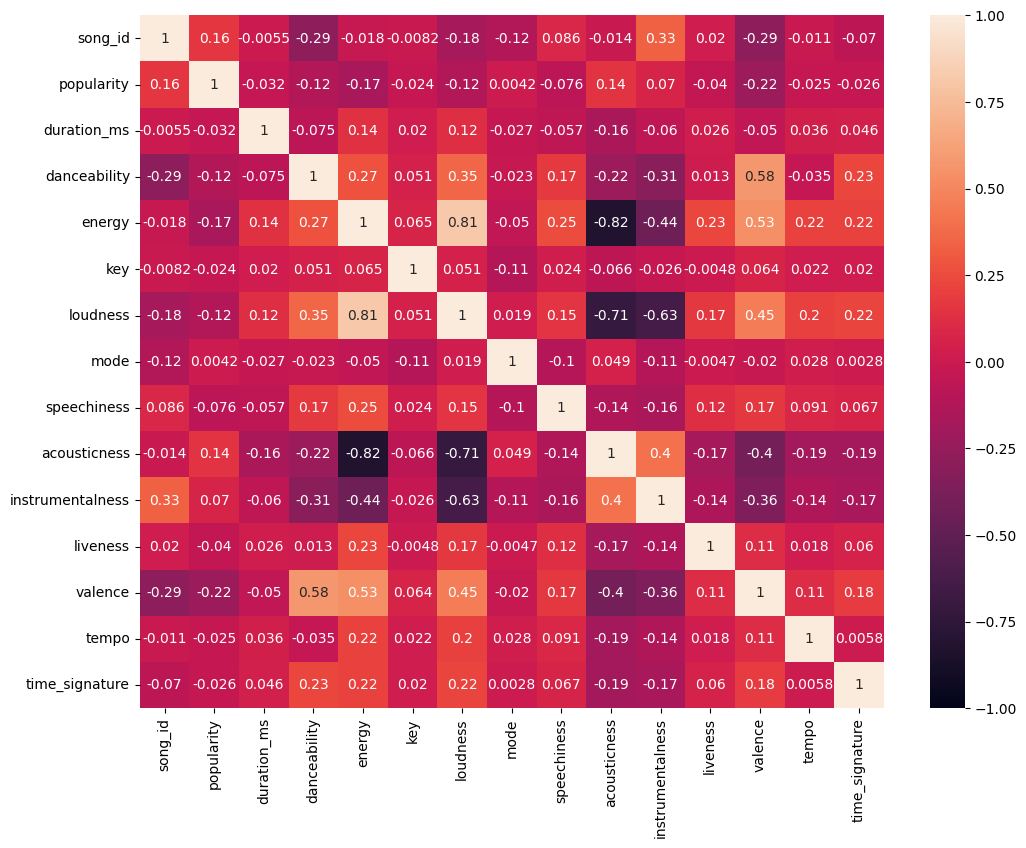

In [51]:
plt.figure(figsize=(12,9))
sns.heatmap (music.corr(), vmin= -1, vmax= 1, annot=True)
plt.show()

array([[<Axes: title={'center': 'song_id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

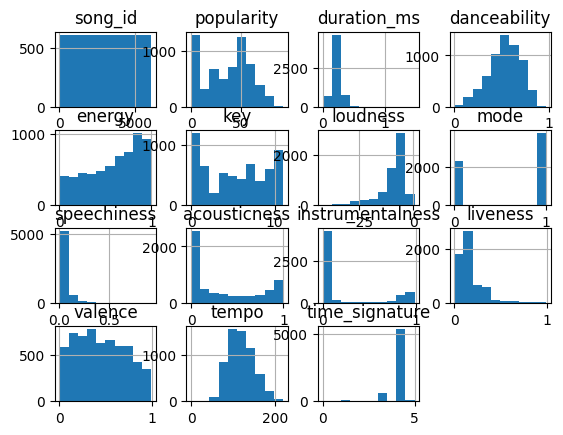

In [52]:
music.hist()

In [53]:
music.columns

Index(['song_id', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

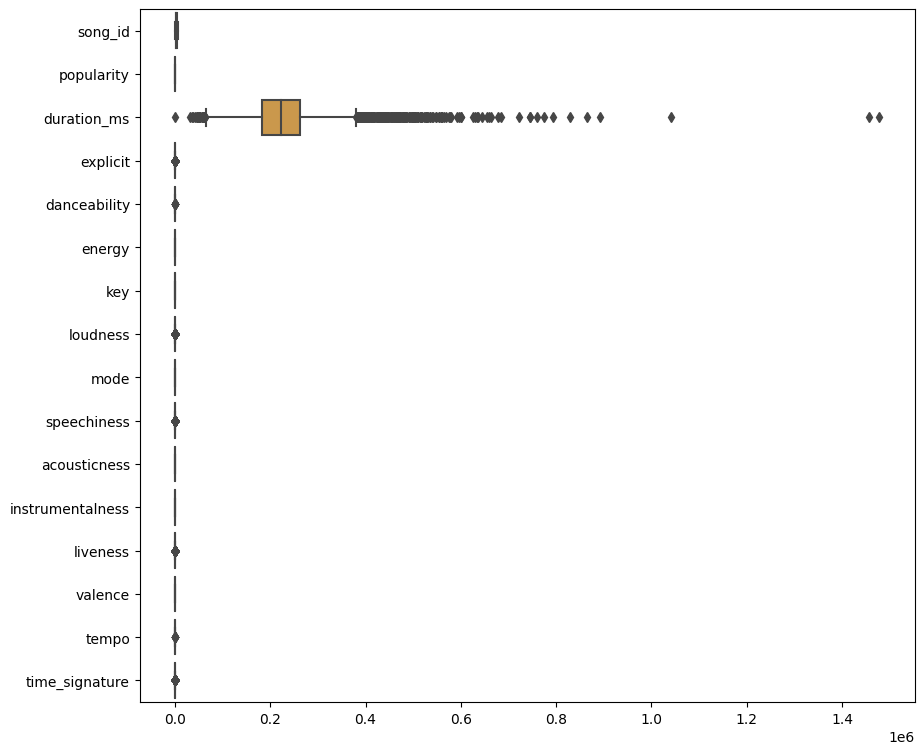

In [54]:
plt.figure(figsize = (10, 9))
sns.boxplot(data=music,orient="h")
plt.show()

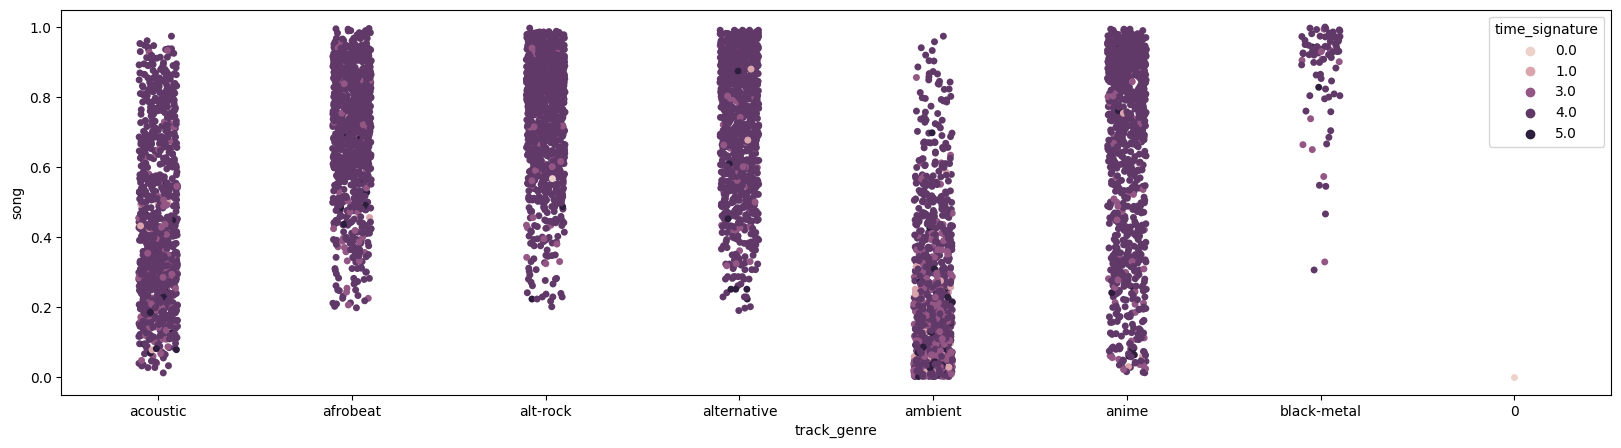

In [55]:
plt.figure(figsize=(20,5))
sns.stripplot(x='track_genre', y='energy',hue='time_signature', data=music)
plt.ylabel('song')
plt.show()

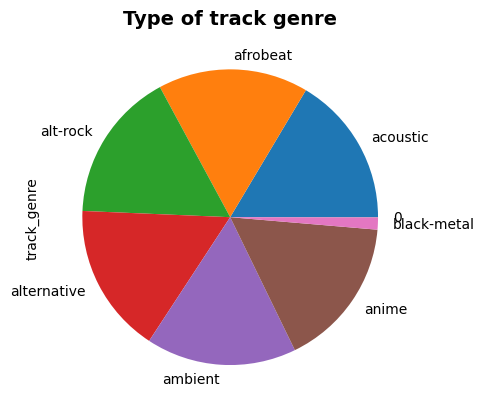

In [56]:
music["track_genre"].value_counts()
music.track_genre.value_counts().plot(kind="pie")
plt.title("Type of track genre", fontsize = 14, fontweight = 'bold')
plt.show()

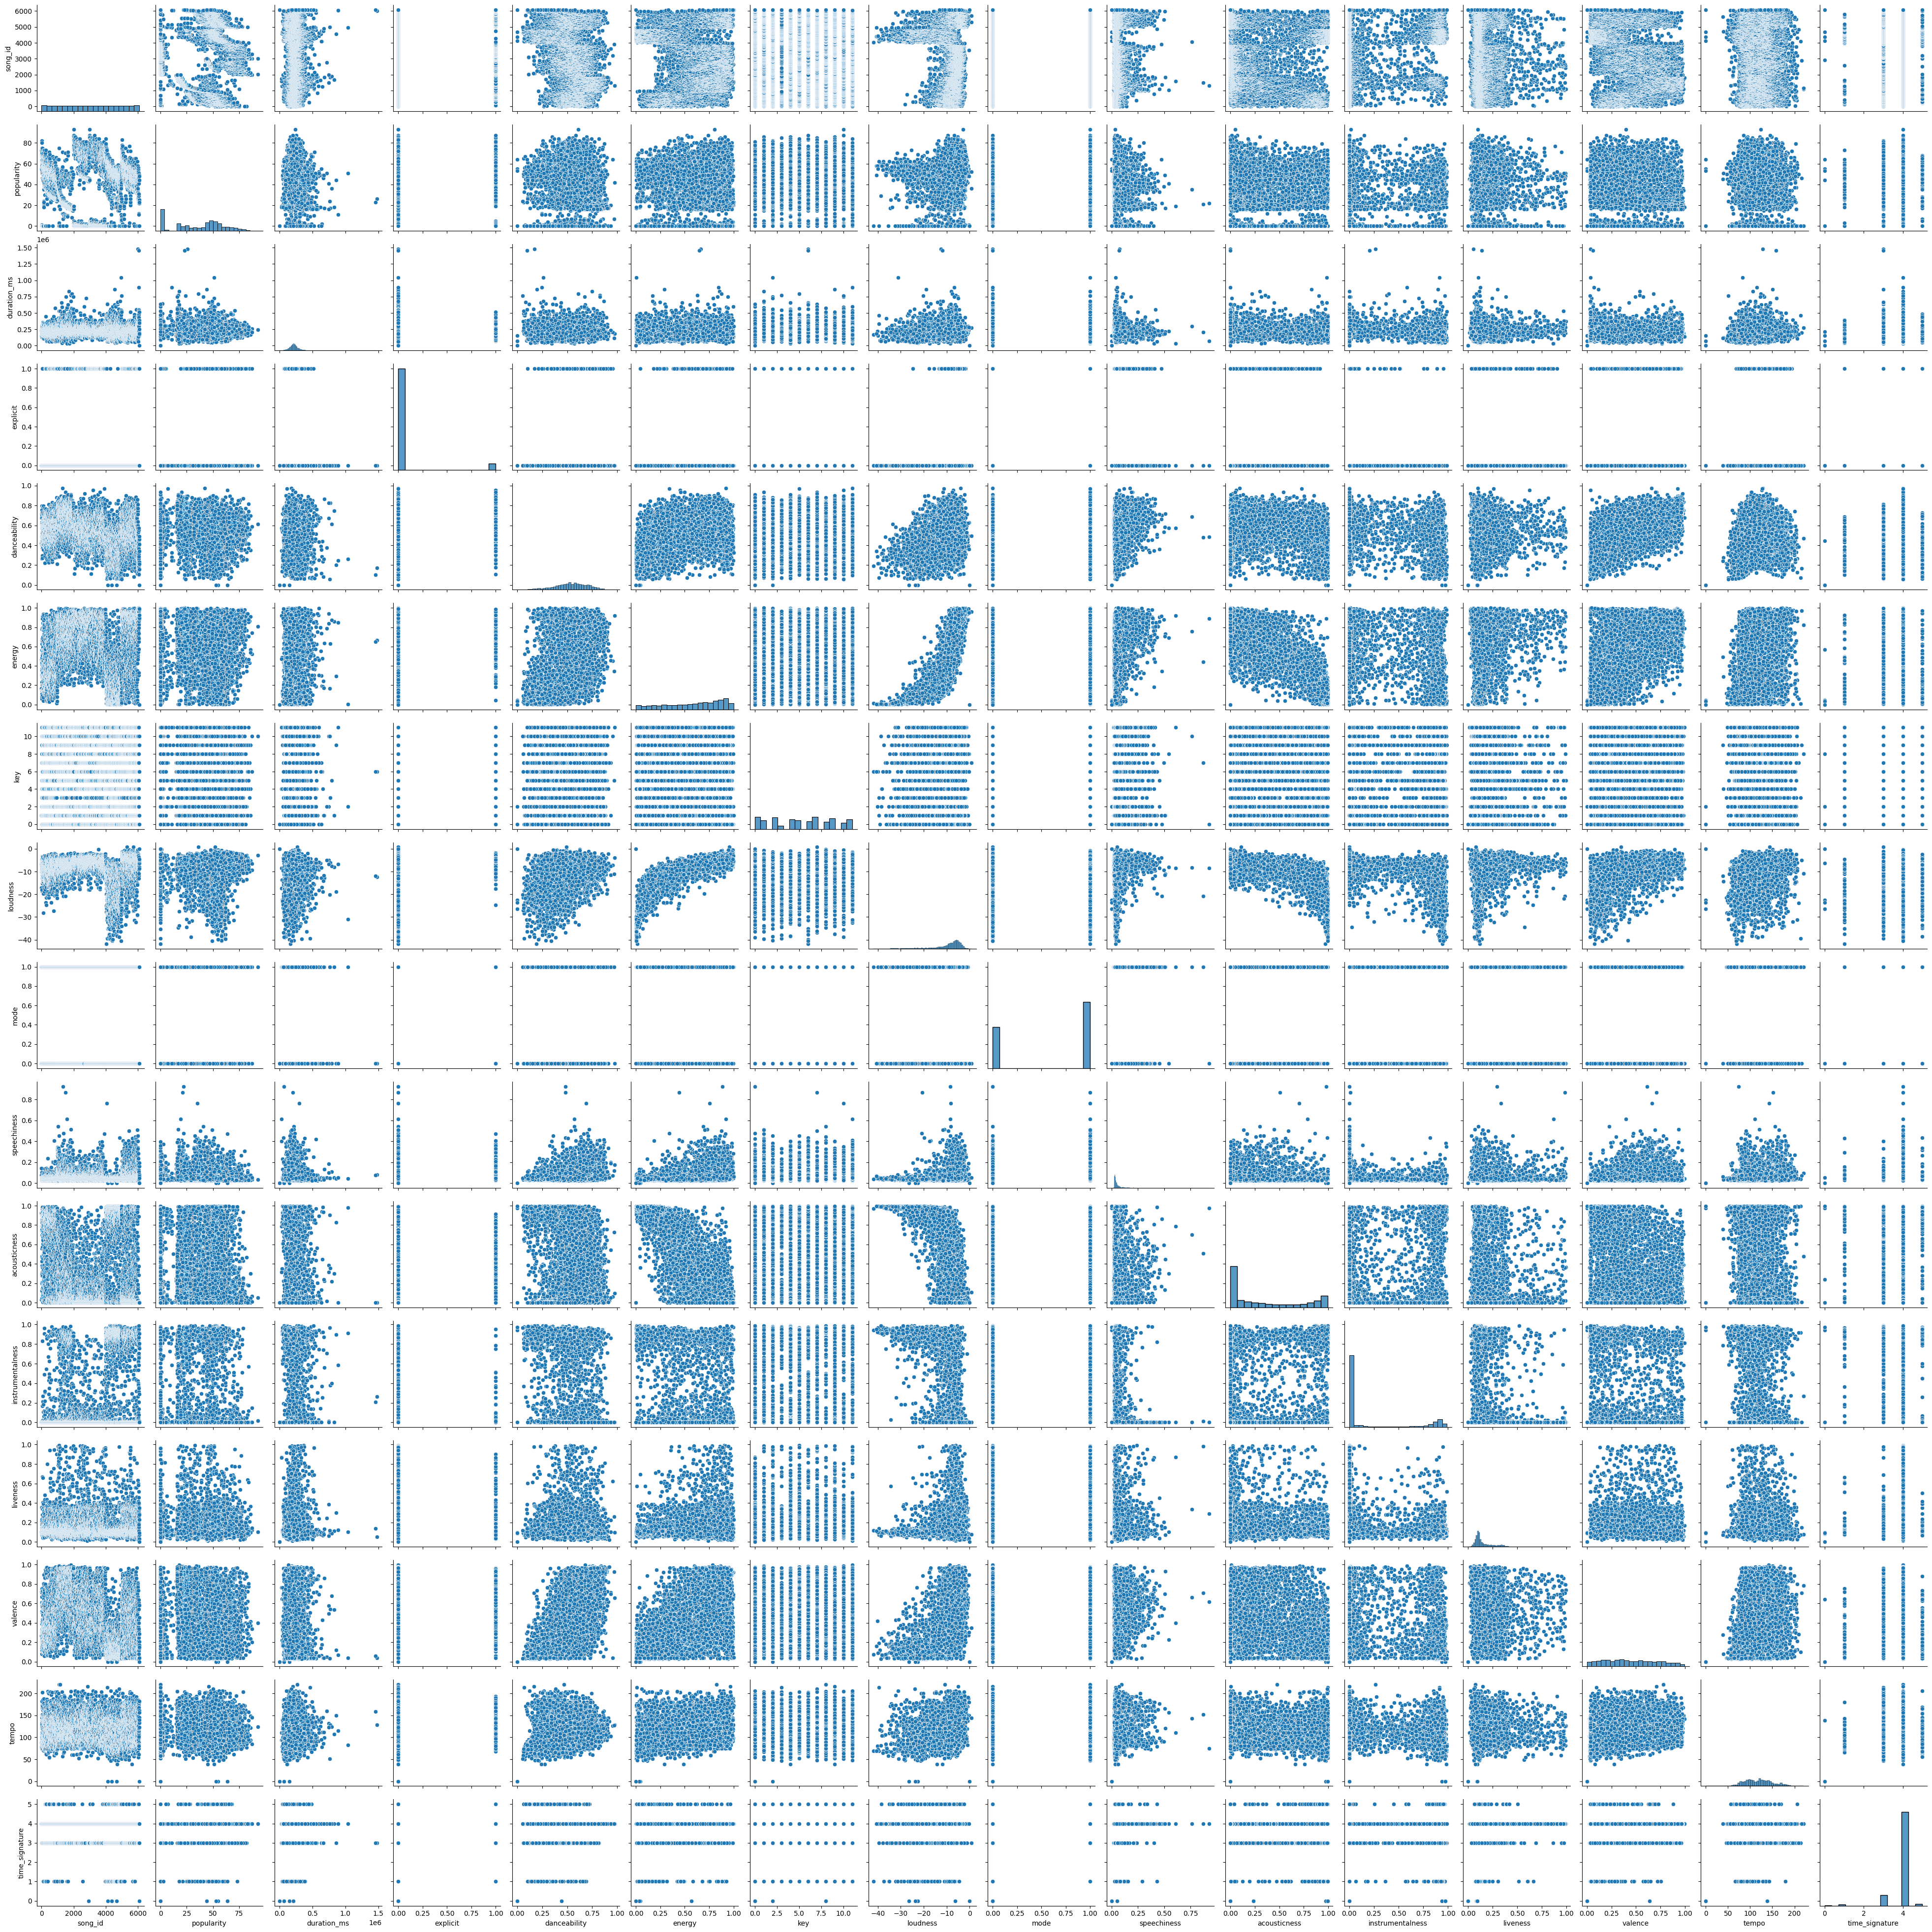

In [57]:
sns.pairplot(music)
plt.show()

Model Building
Collaborative Filtering



In [58]:
music['track_name']

0                             Comedy
1                   Ghost - Acoustic
2                     To Begin Again
3         Can't Help Falling In Love
4                            Hold On
                    ...             
6077               A Fine Day to Die
6078                     Blind Faith
6079    Ostatnie tchnienie Nosferatu
6080                    Onkel Fritze
6081                               0
Name: track_name, Length: 6082, dtype: object

In [59]:
reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(music[['track_name', 'artists', 'popularity']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# svd singular value decomposition
model = SVD()
model.fit(trainset)

predictions = model.test(testset)

accuracy.rmse(predictions)

predict = 'user_id'
items_to_predict = music['track_name'].unique()
user_predictions = [model.predict(predict, item_id) for item_id in items_to_predict]

estimated_ratings = [prediction.est for prediction in user_predictions]

recommendations_df = pd.DataFrame({'track_name': items_to_predict, 'estimated_rating': estimated_ratings})

recommendations_df = recommendations_df.sort_values(by='estimated_rating', ascending=False)

top_recommendations = recommendations_df
print(top_recommendations)


RMSE: 35.4408
                    track_name  estimated_rating
0                       Comedy                10
3179             Don't Give Up                10
3177                     Bylur                10
3176                     Peace                10
3175            Almost Idyllic                10
...                        ...               ...
1586                       Awo                10
1585                 Eledumare                10
1584  Make the Road By Walking                10
1583                      Amor                10
4758                         0                10

[4759 rows x 2 columns]


Neural Network Model

In [125]:
 reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(music[['track_id', 'song_id', 'popularity']], reader)
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

music['user_id_encoded'] = user_encoder.fit_transform(music['popularity'])
music['song_id_encoded'] = song_encoder.fit_transform(music['song_id'])

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

embedding_dim = 50
user_input = Input(shape=(1,), name='user_input')
song_input = Input(shape=(1,), name='song_input')
user_embedding = Embedding(input_dim=len(user_encoder.classes_), output_dim=embedding_dim, input_length=1)(user_input)
song_embedding = Embedding(input_dim=len(song_encoder.classes_), output_dim=embedding_dim, input_length=1)(song_input)
user_flatten = Flatten()(user_embedding)
song_flatten = Flatten()(song_embedding)
concatenated = Concatenate()([user_flatten, song_flatten])
dense1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
output = Dense(1)(dense1)


model = Model(inputs=[user_input, song_input], outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

model.fit([music['user_id_encoded'], music['song_id_encoded']], music['popularity'], epochs=10, batch_size=64, validation_split=0.1)

predictions = model.predict([music['user_id_encoded'], music['song_id_encoded']])
mse = mean_squared_error(music['popularity'], predictions)
print(f'Mean Squared Error on Test Set: {mse}')

def recommend_songs(user_id, num_recommendations=100):
    unique_songs = music['song_id_encoded'].unique()
    user_id_encoded = user_encoder.transform([user_id])[0]
    user_ids = np.full_like(unique_songs, user_id_encoded)
    ratings = model.predict([user_ids, unique_songs])
    top_indices = np.argsort(ratings.flatten())[-num_recommendations:][::-1]
    recommended_songs = song_encoder.inverse_transform(unique_songs[top_indices])
    return recommended_songs

user_id_to_recommend = 34
recommendations = recommend_songs(user_id_to_recommend)
print(recommendations)


Epoch 1/10
86/86 [==============================] - 1s 6ms/step - loss: 1740.7260 - val_loss: 1380.7271
Epoch 2/10
86/86 [==============================] - 0s 5ms/step - loss: 659.8270 - val_loss: 20.8051
Epoch 3/10
86/86 [==============================] - 0s 4ms/step - loss: 71.9877 - val_loss: 4.9476
Epoch 4/10
86/86 [==============================] - 0s 5ms/step - loss: 22.8802 - val_loss: 4.5401
Epoch 5/10
86/86 [==============================] - 0s 4ms/step - loss: 12.1692 - val_loss: 4.6907
Epoch 6/10
86/86 [==============================] - 0s 4ms/step - loss: 8.2160 - val_loss: 5.1073
Epoch 7/10
86/86 [==============================] - 0s 5ms/step - loss: 6.3028 - val_loss: 5.2859
Epoch 8/10
86/86 [==============================] - 0s 6ms/step - loss: 5.2446 - val_loss: 4.8754
Epoch 9/10
86/86 [==============================] - 1s 7ms/step - loss: 4.6214 - val_loss: 5.1000
Epoch 10/10
191/191 [==============================] - 0s 2ms/step
Mean Squared Error on Test Set: 0.82491

Matrix Factorization Model

In [129]:

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(music[['track_id', 'song_id', 'popularity']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD(n_factors=50, random_state=42)
model.fit(trainset)
predictions = model.test(testset)

mse = accuracy.mse(predictions)
print(f'Mean Squared Error on Test Set: {mse}')

user_id_to_recommend = 'your_user_id'
user_items = music[music['track_id'] == user_id_to_recommend]['song_id'].unique()

all_items = music['song_id'].unique()
items_to_recommend = np.setdiff1d(all_items, user_items)

user_recommendations = []
for item_id in items_to_recommend:
    prediction = model.predict(user_id_to_recommend, item_id)
    user_recommendations.append((item_id, prediction.est))

user_recommendations.sort(key=lambda x: x[1], reverse=True)

top_n_recommendations = user_recommendations[:10]
print(f'Top Recommendations for User {user_id_to_recommend}:')
for item_id, score in top_n_recommendations:
    print(f'Song ID: {item_id}, Predicted Score: {score}')


MSE: 1255.4560
Mean Squared Error on Test Set: 1255.456039441249
Top Recommendations for User your_user_id:
Song ID: 0, Predicted Score: 10
Song ID: 1, Predicted Score: 10
Song ID: 2, Predicted Score: 10
Song ID: 3, Predicted Score: 10
Song ID: 4, Predicted Score: 10
Song ID: 5, Predicted Score: 10
Song ID: 6, Predicted Score: 10
Song ID: 7, Predicted Score: 10
Song ID: 8, Predicted Score: 10
Song ID: 9, Predicted Score: 10
